In [42]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')


In [7]:
data = pd.read_csv("/content/sample_data/Crop_recommendation.csv")

In [8]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [9]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


<Axes: title={'center': 'Amount of Nitrogen in soil'}>

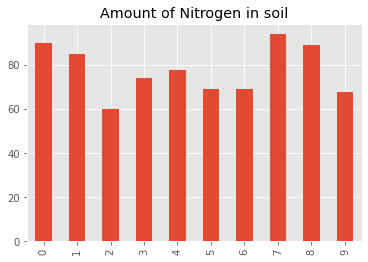

In [51]:
data.isna().sum()
#data.loc[data.duplicated(subset="ph")]
data['N'].value_counts() 
x1 = data['N'].head(10) 
x1.plot(kind='bar', title="Amount of Nitrogen in soil")

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


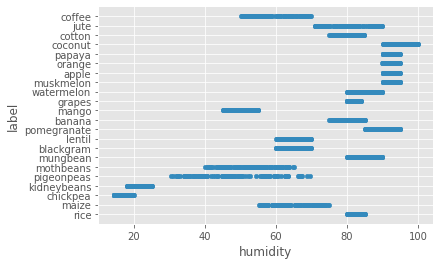

In [56]:
data.plot(kind='scatter',x='humidity', y='label')
plt.show()

<Axes: xlabel='humidity', ylabel='label'>

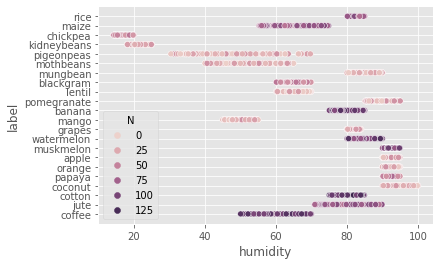

In [63]:
sns.scatterplot(x='humidity', y='label', hue='N', data=data)

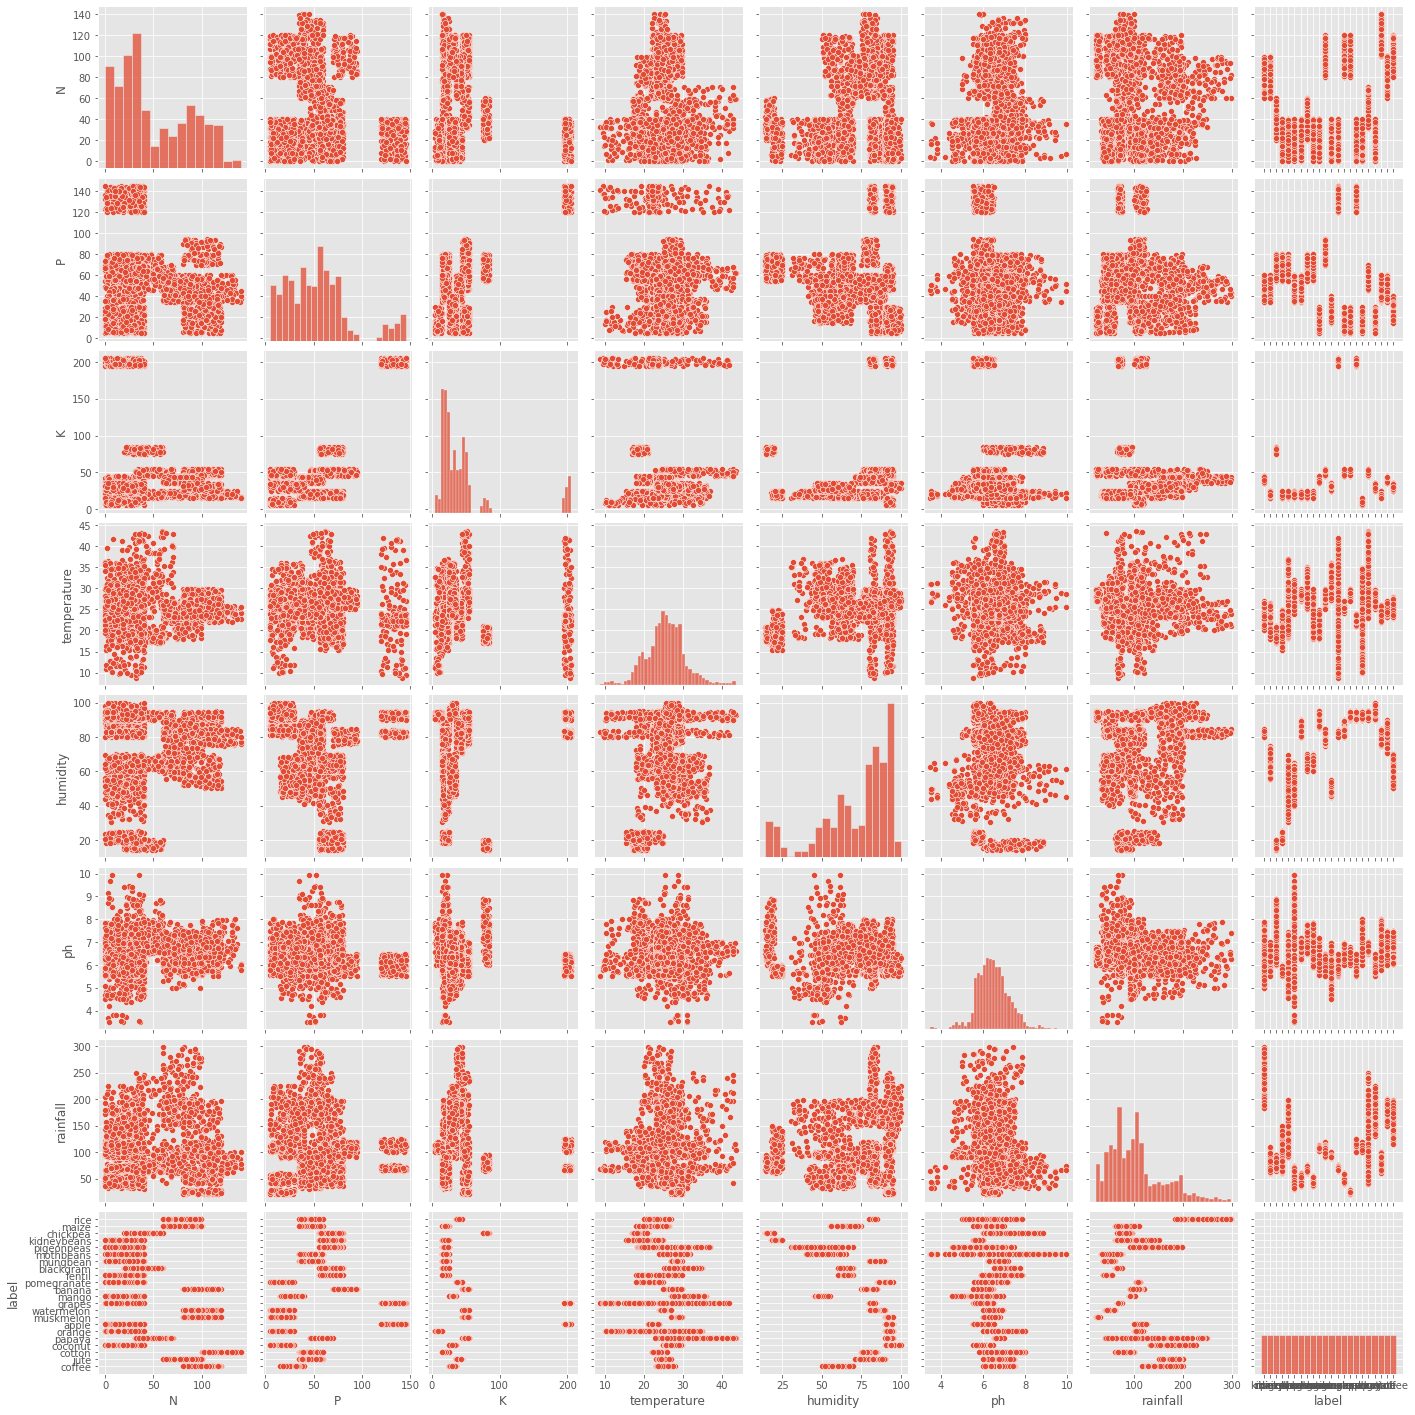

In [65]:
data.head()
sns.pairplot(data, vars=['N','P','K','temperature','humidity','ph','rainfall','label'])

<Axes: >

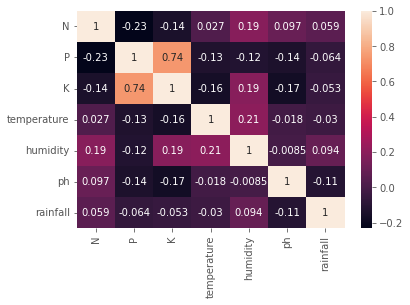

In [70]:
data_corr = data[['N','P','K','temperature','humidity','ph','rainfall','label']].dropna().corr()
sns.heatmap(data_corr, annot=True)

In [85]:
#X = data.iloc[:,4].values
#y = data.iloc[:,-1].values
c=data.label.astype('category')
targets = dict(enumerate(c.cat.categories))
data['target']=c.cat.codes

y=data.target
X=data[['N','P','K','temperature','humidity','ph','rainfall']]
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import joblib

#train and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#X_train = LabelEncoder().fit(X_train)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

joblib.dump(knn,"cropPredictor.sav")
#print(classification_report(y_test,predict))
#print(confusion_matrix(y_test,predict))

['cropPredictor.sav']